# Lab 12 — GMT Part 1
---

## Introduction
Today's lab will start with an introduction to environment management and then cover some of the PyGMT [Py Generic Mapping Tools (PyGMT)](https://www.pygmt.org/latest/overview.html) concepts discussed in lecture. Once you've set up an environment where you can use PyGMT you will start with a sample script for a map of Alaska, make simple maps for your research area, and then move on to adding data to maps.

PyGMT has a fairly steep learning curve because of the vast number of options available to you to control figures. PyGMT is derived from GMT, which is a command line tool for building maps. Luckily, PyGMT is much easier to work with because it has Python's forgiving syntax rules (no errors because there is an extra space somewhere!). 

## Helpful resources
To get started I would recommend reading through [Making your first Figure](https://www.pygmt.org/latest/get-started/first_figure.html#sphx-glr-get-started-first-figure-py). This shows you how easy it can be to make a simple figure. To make more complex figures you will want to start by creating a simple version of what you want, and then tweaking the figure and adding features little by little until you have the final product you want. 

Because of the large number of options available in PyGMT, it is a good idea to get familiar with the [PyGMT documentation](https://www.pygmt.org/latest/api/index.html). Here you can find all of the objects that PyGMT can create, all of the functions you can use on those objects, and all of the arguments that those functions need to run properly.
If you aren't sure exactly what you need, taking a look in the [PyGMT Gallery](https://www.pygmt.org/latest/gallery/index.html) might give you a good starting point and some example code.

## Deliverables
Your deliverable for this lab will be this notebook, with "deliverables" completed as requested below. The "exercises" are exploratory and not graded. Please rename the notebook from lab_12.ipynb to \<last_name\>_lab_12.ipynb prior to submission. Download the file using File  →  Download .ipynb. Submit it to Canvas under the Lab 12 assignment.

## Exercise I: Setting up an environment
You've completed all of the lab and homework assignments for this class inside of OpenSARlab (OSL). We do this so that you don't have to deal with installing software on your own computer and so that we don't need to remotely troubleshoot why something won't run on your computer. Once the class is over and you are (we hope!) using the tools you've learned about here for your own projects you'll need to be able to install and manage them on your own machine. This falls under the scope of "environment management" and is a common stumbling block for people starting out with Python.

Imagine the following scenario: you've written your own code that relies on a feature in the newest version of PyGMT and have a script sent to you by a colleague which they wrote a couple years ago that uses old features of PyGMT that do not exist anymore. How can you set up your computer to run both programs? If you install the newest PyGMT version your script will work but the one your colleague sent will not, and vice versa if you install an older PyGMT version. Installing two PyGMT versions is maybe possible but can quickly lead to headache and confusion. The best solution here is to set up different "environments" to run each script in. When you set up an environment you start with a clean slate to install whatever you want. Software you install inside of the environment won't affect things outside of the environment.

There are several programs that you can use to manage environments. We'll use [Miniconda](https://docs.conda.io/en/latest/miniconda.html), a small version of [Anaconda](https://www.anaconda.com/products/distribution). 

 1. Start by opening a new terminal with **File > New > Terminal**
 2. Run `conda init`
 3. Close the terminal you opened and then open a new one
 4. Run `/bin/bash`
 
You'll use commands that start with `conda` to interact with Miniconda. These first few steps were some housekeeping to set your OSL environment up to play with Miniconda. When you run the last command, `/bin/bash`, you are automatically put inside of an environment called `base`. That is what the `(base)` at the beginning of your terminal prompt means. When you install Miniconda (or Anaconda) the `base` environment is created by default. If you want to install new software it is a good idea to create a new environment.

5. `conda create --name map pygmt pandas numpy`

This command will take a little while to run, and youll need to type `y` and hit enter at one point. When it finishes you'll have created a new environment named "map" with a few libraries installed in it (along with Python). Lets break down what you just ran. The first part, `conda create`, is the command to create a new environment. `--name map` specifies the name of the environment. `pygmt pandas numpy` are the libraries you want to be installed in this environment. Miniconda will install the most recent versions of each library along with the newest version of Python that all of the specified libraries will work with. You could ask for specific versions if you wanted, by modifying the command to read `pygmt=0.2.0` to get an old version of PyGMT, for example. 

6. `conda activate map`

This will "activate" or put you enside of the environment you've just made named `map`

7. `which python`

`which` is a bash command that shows you the full path to the command you are running (i.e. where it lives on your computer). Running `which python` inside of the map environment will return `/opt/conda/envs/map/bin/python`, showing that the Python you are using when the `map` environment is activated is the one installed when you created the map environment (notice the `envs/map` part of the path - you just created that directory).

8. Run `conda deactivate`

This command "deactivates" or removes you from the environment you are currently in, which was the `map` environment. Since we were in the `base` environment earlier we'll be taken back to that. 

9. `which python`

This will return a different path than the `which python` you ran inside of the `map` environment - this is the path to the Python program that the `base` environment uses.

The purpose of this exercise was to demonstrate how environments work with a small example. Miniconda and other environment managers are very complex tools, but usually the basic usage is pretty straightforward. Here is a link to the Miniconda/Anaconda [getting started page](https://docs.conda.io/projects/conda/en/stable/user-guide/getting-started.html#) if you'd like to learn more.


## Exercise II: Sample GMT scripting
PyGMT is already installed in your `base` environment so you don't need to set a new environment up to do this lab.

For this first section, review the code cell below which generates a map of Alaska including shaded relief. As a starting point, look through the script and run it once to see 
what the generated output looks like. Then comment out various lines in the script to explore what 
the various commands do (e.g. if you comment out one line and the word "FAIRBANKS" disappears, that is probably the line that puts that word on the map).

pygmt-session [WARNING]: Remote dataset given to a data processing module but no registration was specified - default to gridline registration (if available)


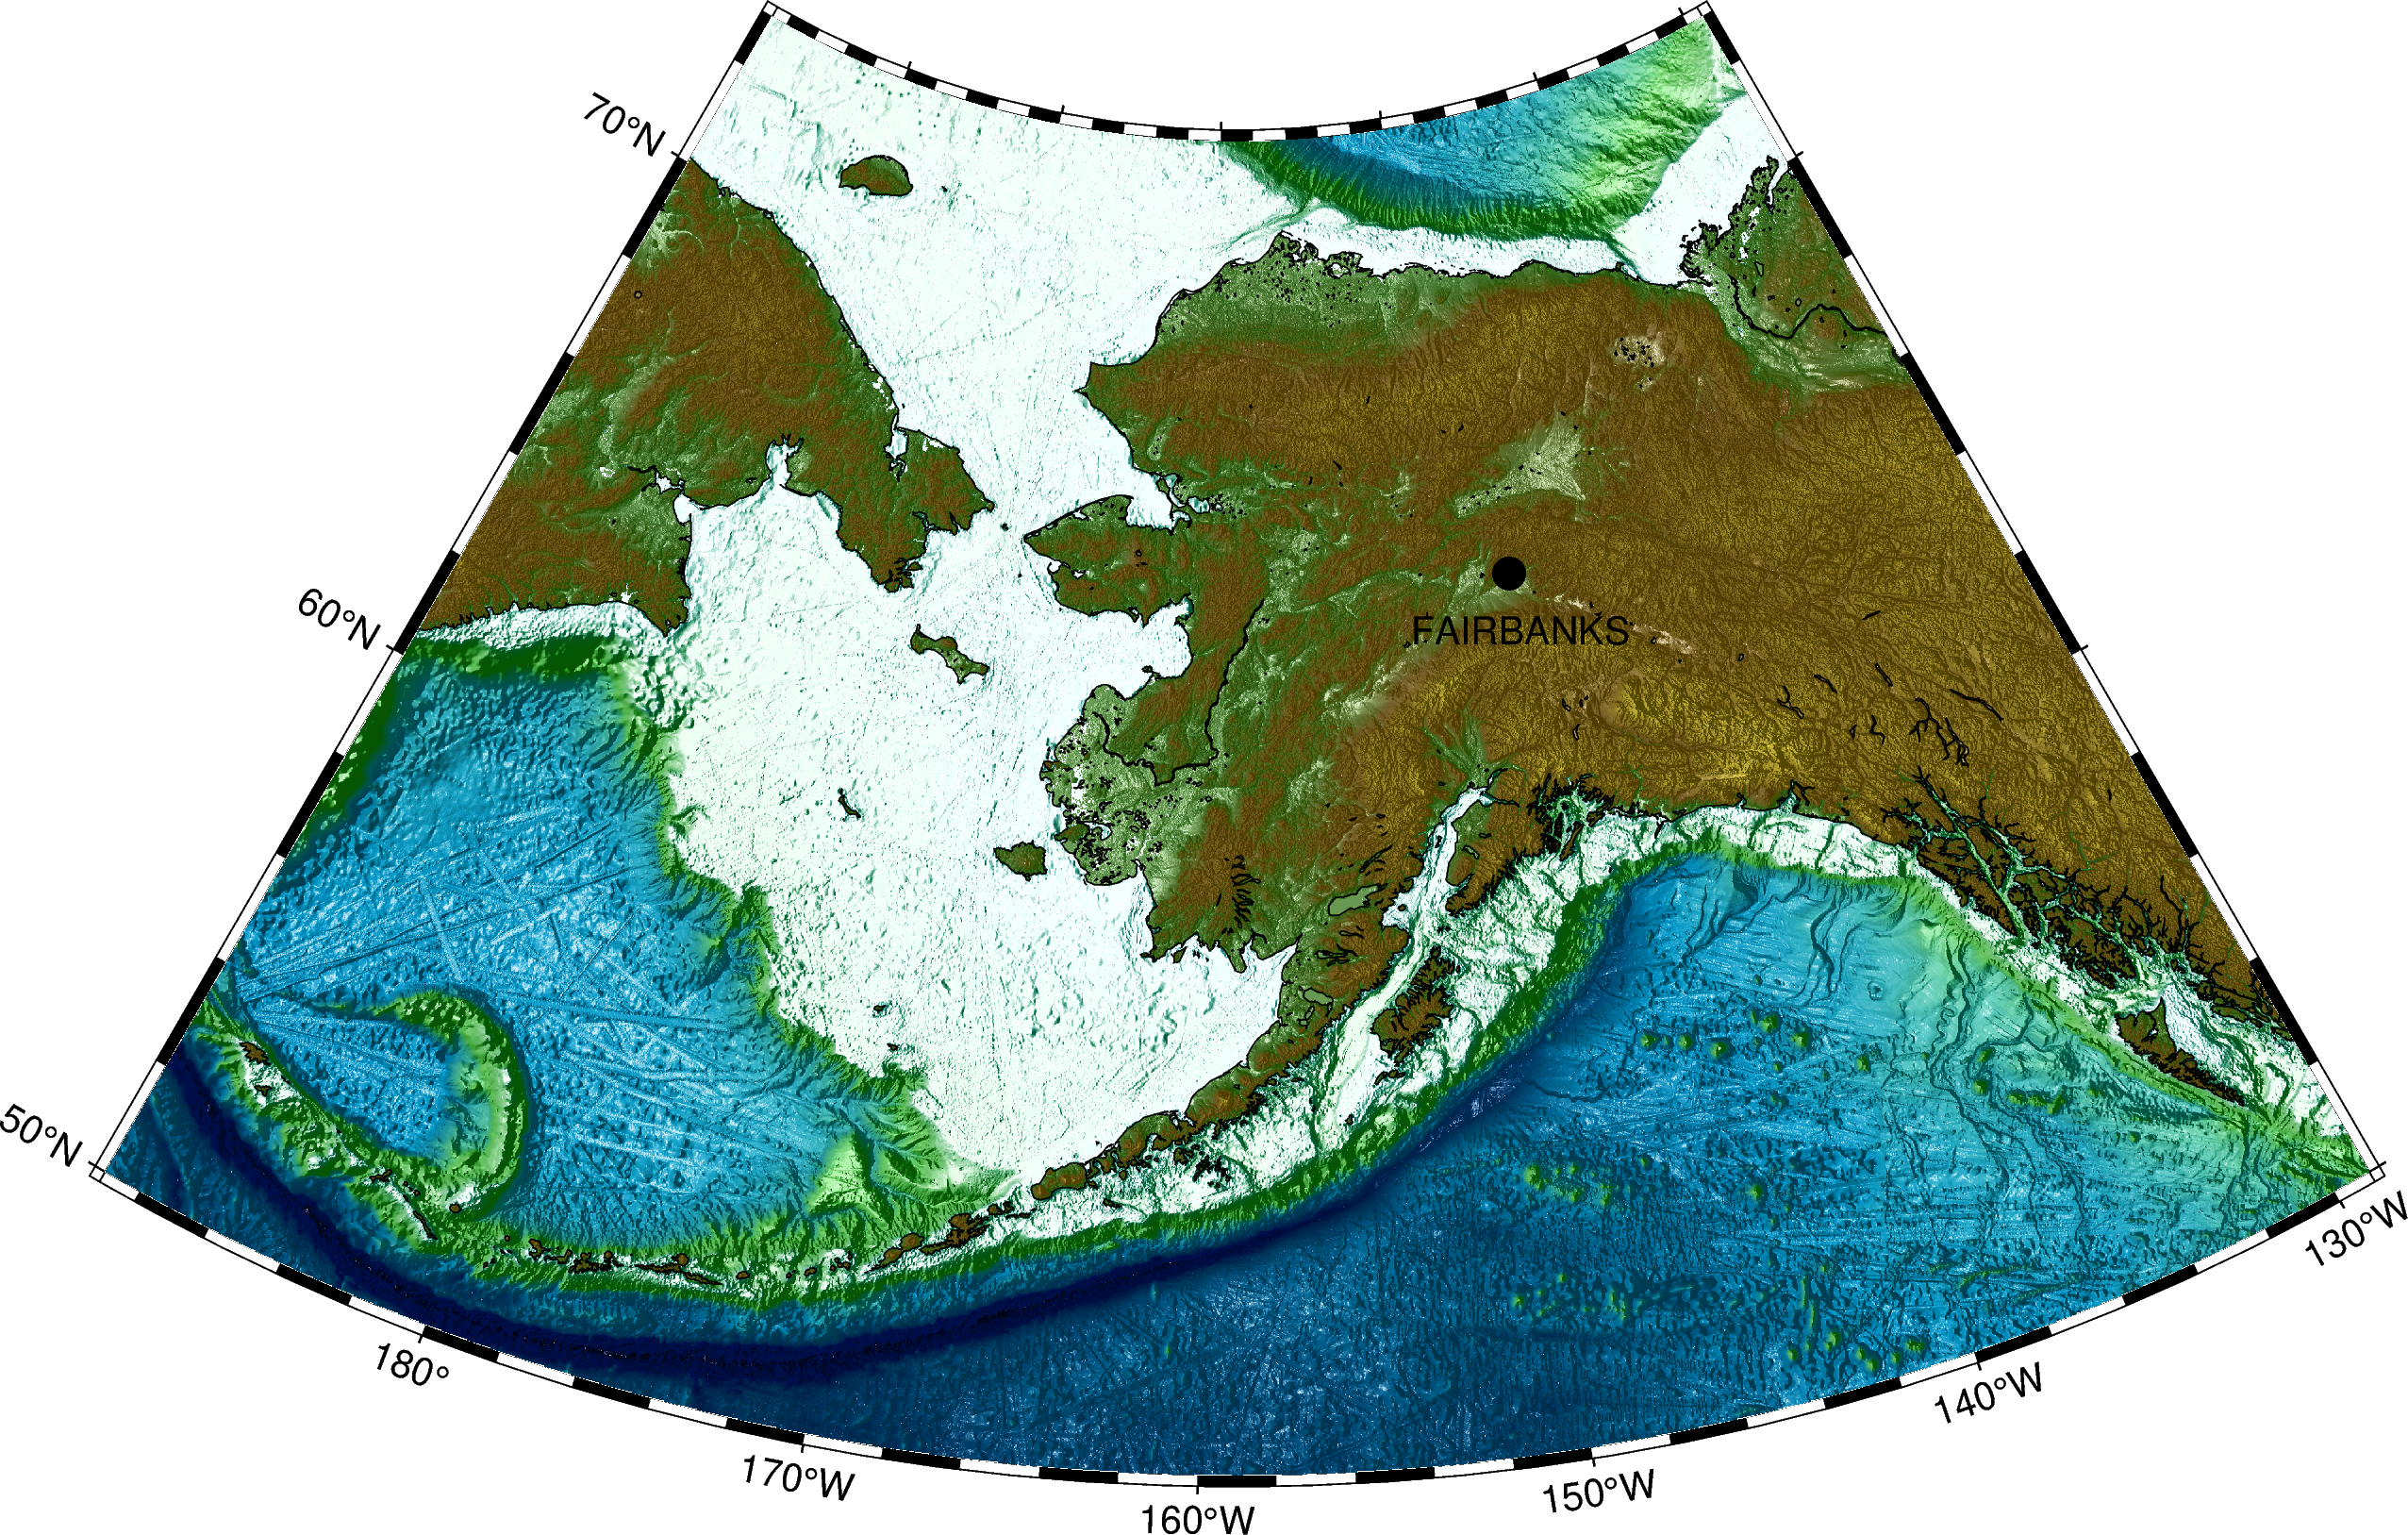

In [3]:
import pygmt

FBX_LON=-147.7164
FBX_LAT=64.8378

load_grid = pygmt.datasets.load_earth_relief(resolution="05m", region=[171,231,50,73])
fig = pygmt.Figure()
fig.basemap(frame=True, region=[171,231,50,73], projection='S201/90/8i')
dgrid = pygmt.grdgradient(grid=load_grid, radiance=[270,30])
fig.grdimage(grid=load_grid, shading=dgrid, cmap="relief")
fig.coast(shorelines=True)
fig.plot(x=FBX_LON, y=FBX_LAT, style="c0.3c", color="black")
fig.text(x=FBX_LON, y=FBX_LAT-1, text="FAIRBANKS")

fig.show()

## Deliverable 1: Test of example script — explore the options <font color='red'>(25 points)</font>
Now modify the script to create a map of Alaska with:
* national boundaries as red lines
* a different colormap for the shaded relief
* Fairbanks marked with a red square

## Deliverable 2: Regional map of research area <font color='red'>(25 points)</font>

Create a map of the continent (e.g., North America) where your research area is located (or just pick your favorite continent). Use a [Lambert Azimuthal Equal Area projection](https://www.pygmt.org/latest/projections/azim/azim_lambert.html#sphx-glr-projections-azim-azim-lambert-py) color land masses light brown, water white, any state/country borders in green, and include a map scale in the bottom right corner. Add latitude and longitude lines at a reasonable interval.

## Deliverable 3: Close-up of research area <font color='red'>(25 points)</font>

Create a map of your research area (or your favorite region of your favorite continent). Use a [Mercator projection](https://www.pygmt.org/latest/projections/cyl/cyl_mercator.html), color land masses light brown, water blue, any state/country borders in green, and include a map scale in the bottom right corner. Set the latitude and longitude tickmarks at a reasonable range and interval for your region and display them on the west and south portions of the map.

## Deliverable 4: Map of Alaska seismicity <font color='red'>Only Required for 636 Students (25 points)</font>

Now that you are experts in creating simple maps, you will now gain experience adding additional information to them. The ability to add additional data to the plots is incredibly useful — you can think about this as layering more and more information to the underlying basemap that you already created. Examples of additional data layers include geographic locations of sample locations, stations, volcanoes, faults, etc.

We'll explore more complex plotting in the next lab by adding in a wide range of data, but for this week, you'll work with a simple map, adding in locations of earthquakes. We've a provided a data file for use here, and we provide some help, but reading the documentation will be essential.

We'll be using data from `query.csv` that is in the `lab_12` folder. To extract the earthquakes that are within a certain lat-lon box, you can use `awk` again, expanding on our usage from lab 10:

```
awk -F, 'NR>1 {print $3, $2, $4, $5}' query.csv > ak_eqs.xy
```
OR, you can read the file directly into python with pandas and select rows using the .loc function:
```
import pandas as pd
eqs = pd.read_csv(query.csv)
eqs = eqs.loc[ ... ]
```



First, use [`makecpt`](https://www.pygmt.org/latest/api/generated/pygmt.makecpt.html) to make a color palette based on the earthquake depth data. It may be helpful to review a tutorial similar to this task [here](https://www.pygmt.org/latest/tutorials/basics/plot.html#sphx-glr-tutorials-basics-plot-py).

Plot the [coast](https://www.pygmt.org/latest/api/generated/pygmt.Figure.coast.html), color the land white, and the ocean light blue. Set the latitude and longitude ticks to plot every 2.5 degrees and annotate every 5 degrees. Create a [stereographic](https://www.pygmt.org/latest/projections/azim/azim_general_stereographic.html#sphx-glr-projections-azim-azim-general-stereographic-py) projection map of earthquakes located in southern Alaska in the region:

```
min_lat=50
max_lat=65
min_lon=-170
max_lon=-125
```

Now use [`plot`](https://www.pygmt.org/latest/api/generated/pygmt.Figure.plot) to plot the earthquakes as circles that have a color that changes with depth, pick a size that results in a legible map.

Include a [colorbar](https://www.pygmt.org/latest/api/generated/pygmt.Figure.colorbar.html) representing the depth scale.